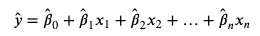

where  𝑛  is the number of predictors,  𝛽0  is the intercept, and  𝑦̂   is the so-called "fitted line" or the predicted value associated with the dependent variable.

**Categorical variables**: they represent categories instead of numerical features

To identify categorical variables: A first thing you can do is use the .describe() and .info() methods. .describe() will give you info on the data types (like strings, integers, etc), but even then continuous variables might have been imported as strings, so it's very important to really have a look at your data. 

__Question:__ How do we choose important variables

- Straight forward selection: try all possible combination with variables and use AIC, BIC etc to choose best.

- Forward selection:

    1. Start with null model
    2. Then one linear model for each separate variables
    3. Pick the variable with lowest RSS
    4. We then add to that model the variable that results variable selection 
    in the lowest RSS for the new two-variable model.
    5. Repeat this until a stoppage criteria is achieved.
- Backward selection

- Mixed Selection

## Transforming categorical variables

When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:
- 1) Perform label encoding
- 2) Create dummy variables / one-hot-encoding

**Label encoding**`

1) Put items into a series with --> pd.series(origin)
2) Assign series a "category" type with --> cat_origin = origin_series.astype('category')

You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1.

3) Use scikit-learn 
- from sklearn.preprocessing import LabelEncoder
- lb_make = LabelEncoder()

4) origin_encoded = lb_make.fit_transform(cat_origin)

**Create dummy variables**

The idea is to convert each category into a new column, and assign a 1 or 0 to the column. 

1) pd.get_dummies(cat_origin)

The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), **one-hot encoding is required** when adding categorical variables in a regression model!

**Dummy Variable Trap**

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. This is known as perfect multicollinearity and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can perfectly predict what one variable will be using some combination of the other variables. 

Fortunately, the dummy variable trap can be avoided by simply dropping one of the dummy variables. You can do this by:  
1) Convert columns to dummies and drop first variable: passing ```drop_first=True``` to ```get_dummies()```   
2) remove the original columns from our data and add the dummy columns instead: 
- data = data.drop(['cylinders','model year','origin'], axis=1)  

3) Bring it all together
- data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)